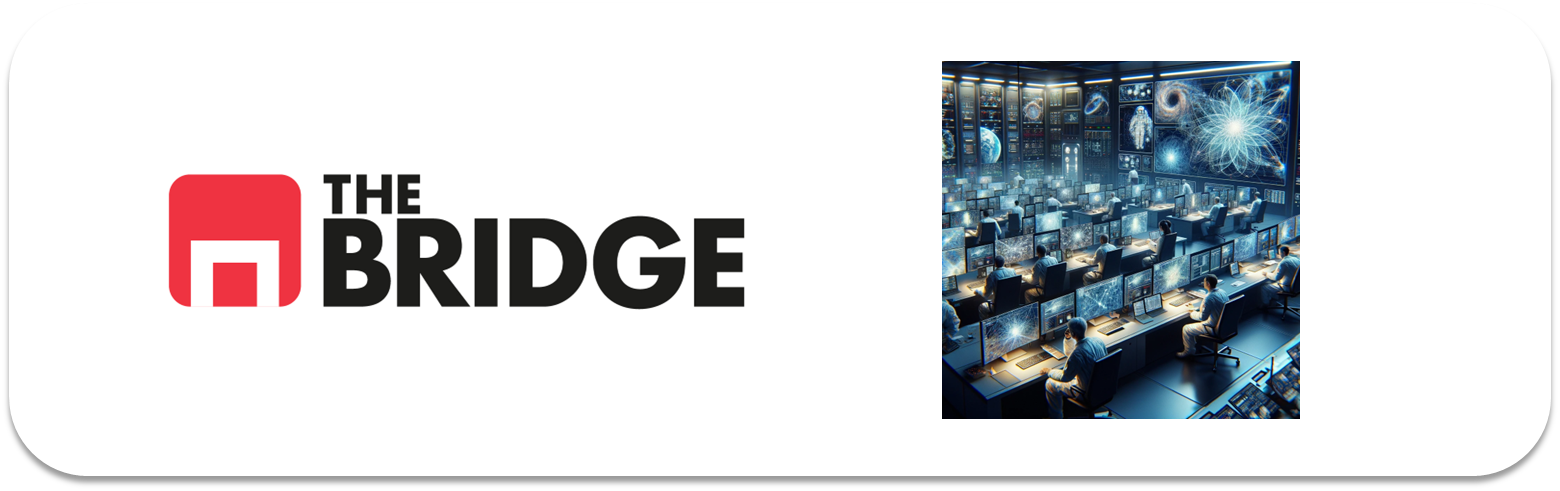

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [26]:
import os
import cv2
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt


### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [27]:


def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (32, 32))
            images.append(img)
            label = 1 if 'dog' in filename else 0
            labels.append(label)
    return np.array(images), np.array(labels)

# Load training ./data
train_folders = ['./data/github_train_0', './data/github_train_1', './data/github_train_2', './data/github_train_3']
X_train = []
y_train = []
for folder in train_folders:
    images, labels = load_images_from_folder(folder)
    X_train.extend(images)
    y_train.extend(labels)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Load test ./data
X_test, y_test = load_images_from_folder('./data/github_test')

print(f'Training ./data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test ./data shape: {X_test.shape}, Test labels shape: {y_test.shape}')

Training ./data shape: (4000, 32, 32, 3), Training labels shape: (4000,)
Test ./data shape: (1000, 32, 32, 3), Test labels shape: (1000,)


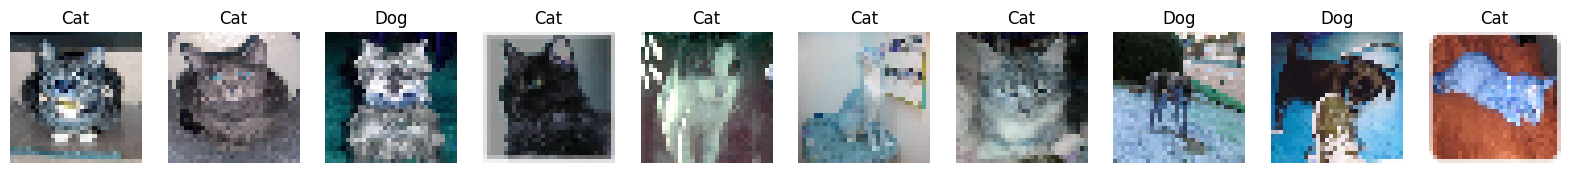

In [28]:
#Creamos una funcion que elija fotos distintas de forma aleatoria cada vez que se ejecute

def plot_sample_images(images, labels, n=10):
    indices = np.random.choice(len(images), n, replace=False)
    plt.figure(figsize=(20, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.title('Dog' if labels[idx] == 1 else 'Cat')
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

In [29]:
#Normalizamos las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

#Convertimos las labels en categorías
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)


In [37]:

#Creamos el modelo y lo compilamos

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,690 (1.20 MB)

 Trainable params: 314,690 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6143 - loss: 0.6766 - val_accuracy: 0.0000e+00 - val_loss: 1.0135
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6518 - loss: 0.6172 - val_accuracy: 0.6587 - val_loss: 0.6376
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7139 - loss: 0.5716 - val_accuracy: 0.3775 - val_loss: 0.9476
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7328 - loss: 0.5267 - val_accuracy: 0.6762 - val_loss: 0.6061
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7764 - loss: 0.4895 - val_accuracy: 0.7987 - val_loss: 0.4755
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8021 - loss: 0.4412 - val_accuracy: 0.5763 - val_loss: 0.7881
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8314 - loss: 0.3847 - val_accuracy: 0.3938 - val_loss: 1.2317
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8388 - loss: 0.3584 - val_accurac

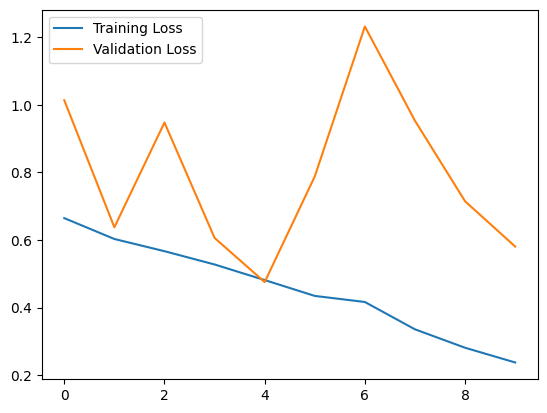

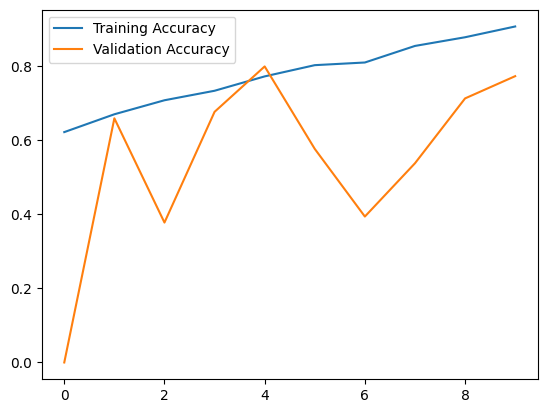

In [38]:
from keras.callbacks import EarlyStopping

# Definimos el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenamos el modelo
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Mostramos el historial de entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6476 - loss: 0.6260
Test Loss: 0.5676725506782532
Test Accuracy: 0.7099999785423279
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         Cat       0.77      0.60      0.67       500
         Dog       0.67      0.82      0.74       500

    accuracy                           0.71      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.72      0.71      0.71      1000



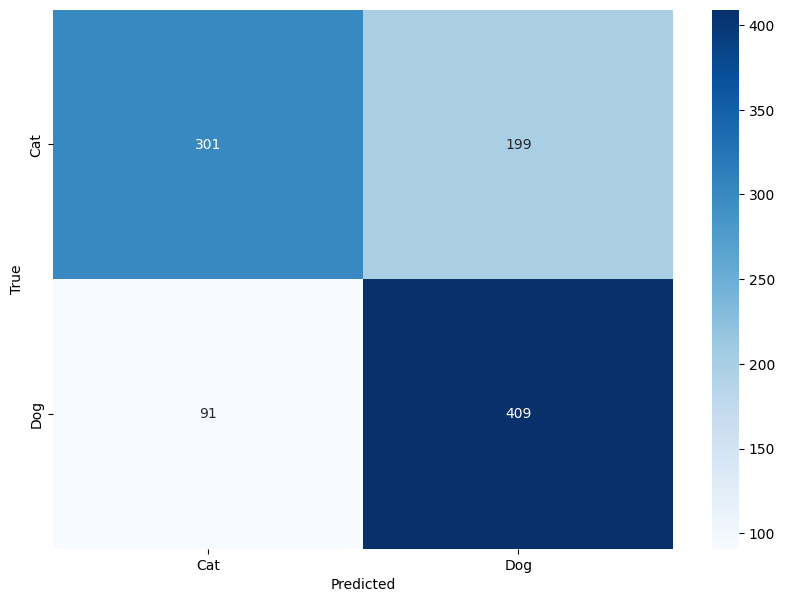

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=['Cat', 'Dog']))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

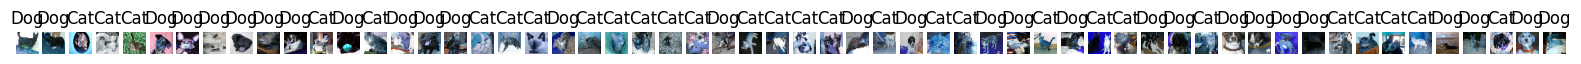

In [40]:
# Identificar las imágenes mal clasificadas
misclassified_indices = np.where(y_true != y_pred_classes)[0]

# Calcular la confianza de la predicción errónea
misclassified_confidences = y_pred[misclassified_indices, y_pred_classes[misclassified_indices]]

# Crear un DataFrame para facilitar la manipulación
misclassified_df = pd.DataFrame({
    'index': misclassified_indices,
    'true_label': y_true[misclassified_indices],
    'predicted_label': y_pred_classes[misclassified_indices],
    'confidence': misclassified_confidences
})

# Seleccionar el 10% de las imágenes mal clasificadas con mayor confianza para cada clase
top_10_percent_dogs_as_cats = misclassified_df[(misclassified_df['true_label'] == 1) & (misclassified_df['predicted_label'] == 0)].nlargest(int(0.1 * len(misclassified_df)), 'confidence')
top_10_percent_cats_as_dogs = misclassified_df[(misclassified_df['true_label'] == 0) & (misclassified_df['predicted_label'] == 1)].nlargest(int(0.1 * len(misclassified_df)), 'confidence')

# Obtener los índices de las imágenes seleccionadas
selected_indices = np.concatenate([top_10_percent_dogs_as_cats['index'].values, top_10_percent_cats_as_dogs['index'].values])

# Mostrar las imágenes seleccionadas
plot_sample_images(X_test[selected_indices], y_true[selected_indices], n=len(selected_indices))

Hacemos la ultima parte del enunciado generando imagenes

Note: you may need to restart the kernel to use updated packages.
Epoch 1/50


c:\Users\sergi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6784 - loss: 0.6046 - val_accuracy: 0.1850 - val_loss: 1.0821
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6843 - loss: 0.5970 - val_accuracy: 0.3063 - val_loss: 0.9580
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6971 - loss: 0.5775 - val_accuracy: 0.3963 - val_loss: 0.8548
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7067 - loss: 0.5668 - val_accuracy: 0.4225 - val_loss: 0.8277
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6955 - loss: 0.5737 - val_accuracy: 0.5337 - val_loss: 0.7146
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6914 - loss: 0.5695 - val_accuracy: 0.3262 - val_loss: 1.0790
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7085 - loss: 0.5461 - val_accuracy: 0.2950 - val_loss: 1.0753
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7052 - loss: 0.5582 - val_accuracy: 0.491

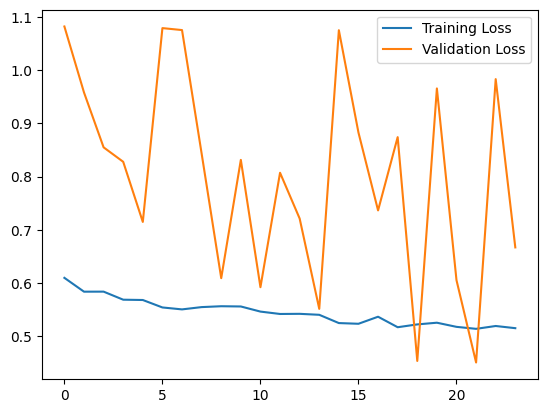

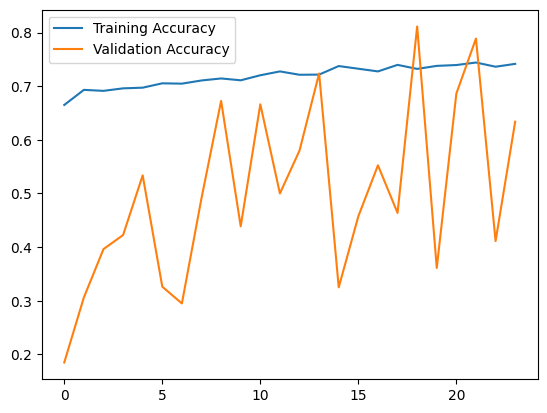

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7323 - loss: 0.5462
Test Loss: 0.501248836517334
Test Accuracy: 0.7599999904632568
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         Cat       0.79      0.71      0.75       500
         Dog       0.74      0.81      0.77       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



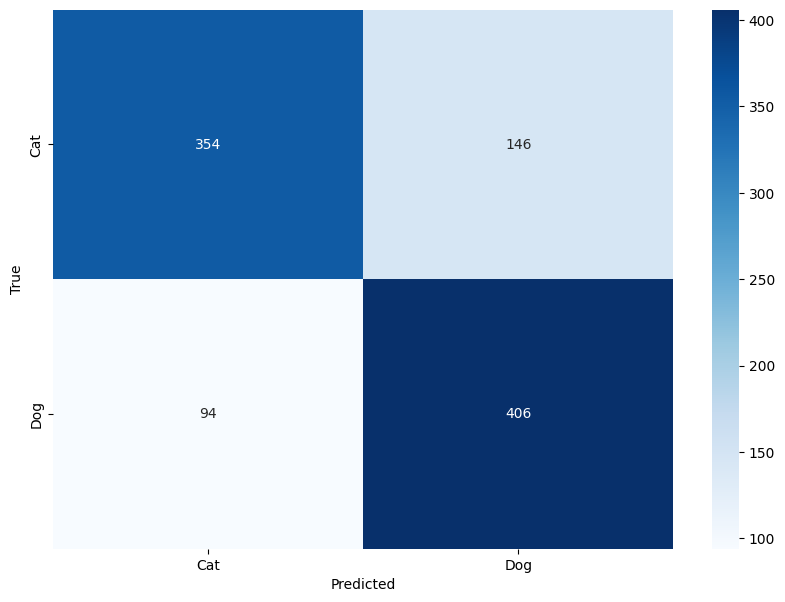

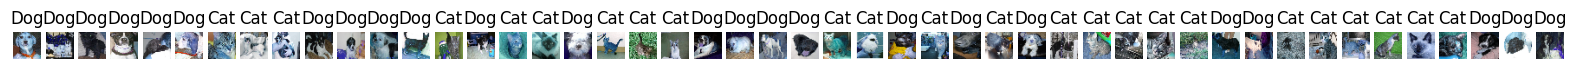

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos el generador de datos con Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Usamos el 20% de los datos para validación
)

# Preparamos los generadores de datos para entrenamiento y validación
train_generator = datagen.flow(X_train, y_train_cat, batch_size=32, subset='training')
validation_generator = datagen.flow(X_train, y_train_cat, batch_size=32, subset='validation')

# Definimos el callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenamos el modelo utilizando el generador de datos
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[early_stopping])

# Mostramos el historial de entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=['Cat', 'Dog']))

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Identificar las imágenes mal clasificadas
misclassified_indices = np.where(y_true != y_pred_classes)[0]

# Calcular la confianza de la predicción errónea
misclassified_confidences = y_pred[misclassified_indices, y_pred_classes[misclassified_indices]]

# Crear un DataFrame para facilitar la manipulación
misclassified_df = pd.DataFrame({
    'index': misclassified_indices,
    'true_label': y_true[misclassified_indices],
    'predicted_label': y_pred_classes[misclassified_indices],
    'confidence': misclassified_confidences
})

# Seleccionar el 10% de las imágenes mal clasificadas con mayor confianza para cada clase
top_10_percent_dogs_as_cats = misclassified_df[(misclassified_df['true_label'] == 1) & (misclassified_df['predicted_label'] == 0)].nlargest(int(0.1 * len(misclassified_df)), 'confidence')
top_10_percent_cats_as_dogs = misclassified_df[(misclassified_df['true_label'] == 0) & (misclassified_df['predicted_label'] == 1)].nlargest(int(0.1 * len(misclassified_df)), 'confidence')

# Obtener los índices de las imágenes seleccionadas
selected_indices = np.concatenate([top_10_percent_dogs_as_cats['index'].values, top_10_percent_cats_as_dogs['index'].values])

# Mostrar las imágenes seleccionadas
plot_sample_images(X_test[selected_indices], y_true[selected_indices], n=len(selected_indices))